In [1]:
from torchvision.io.image import read_image
#from torchvision.models.segmentation import fcn_resnet50, FCN_ResNet50_Weights
from torchvision.transforms.functional import to_pil_image
from PIL import Image
from torchvision import models

model = models.segmentation.fcn_resnet101(pretrained=True).eval()

img = Image.open("../data/hymenoptera_data/train/ants/0013035.jpg")

import torchvision.transforms as T
trf = T.Compose([T.Resize(256),
                 T.CenterCrop(224),
                 T.ToTensor(), 
                 T.Normalize(mean = [0.485, 0.456, 0.406], 
                             std = [0.229, 0.224, 0.225])])
inp = trf(img).unsqueeze(0)

# Step 3: Apply inference preprocessing transforms
#batch = preprocess(img).unsqueeze(0)

# Step 4: Use the model and visualize the prediction
prediction = model(inp)["out"]
normalized_masks = prediction.softmax(dim=1)
#class_to_idx = {cls: idx for (idx, cls) in enumerate(weights.meta["categories"])}
#mask = normalized_masks[0, class_to_idx["dog"]]
#to_pil_image(mask).show()

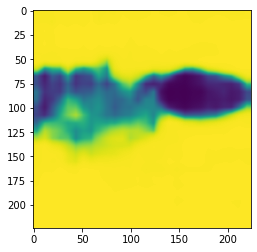

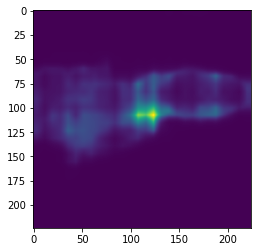

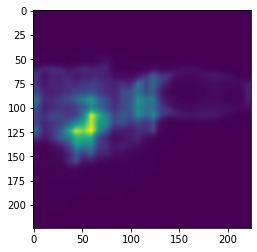

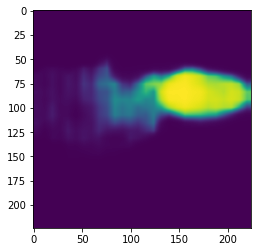

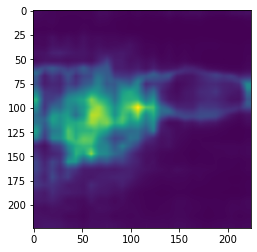

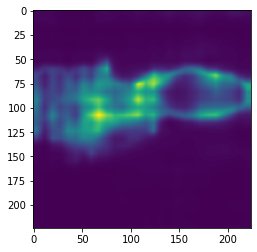

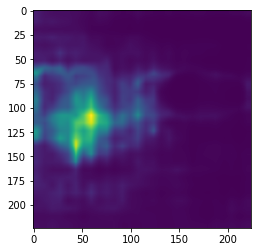

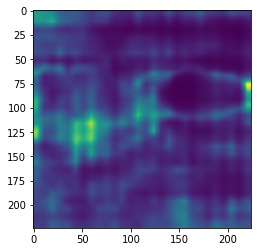

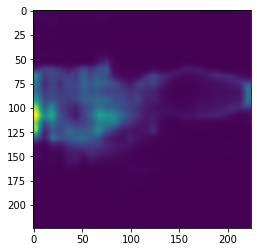

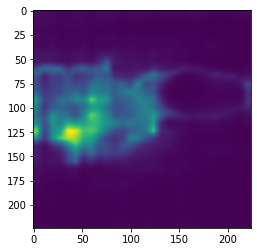

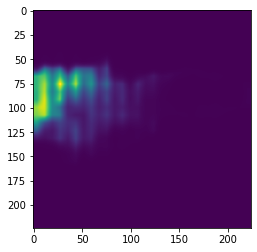

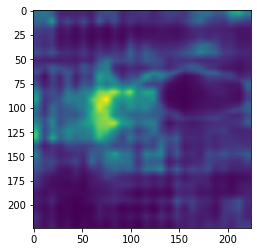

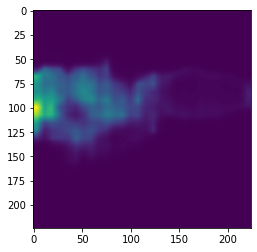

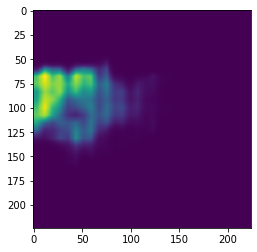

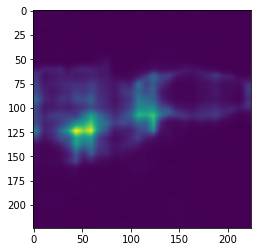

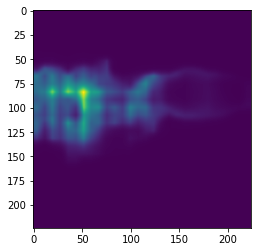

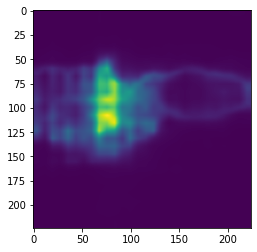

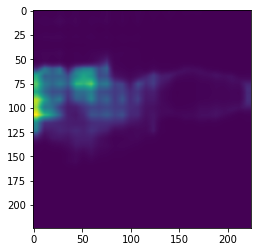

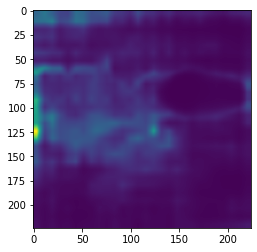

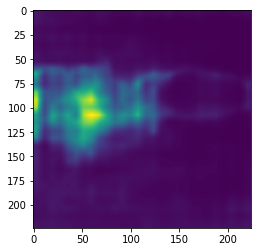

In [2]:
import matplotlib.pyplot as plt

for i in range(20):
    plt.imshow(normalized_masks[0][i].detach().numpy())
    plt.show()

In [10]:
model.parameters.transforms

AttributeError: 'function' object has no attribute 'transforms'